# DLVC 2017
# 2nd July 2017, Tutorial 1 
# Python for Visual Computing

*Reference: Programming Computer Vision with Python by Jan Erik Solem*

### Exercise 1: Basic Image Handling and Processing

### Python Image Library (PIL) [http://www.pythonware.com/products/pil/]

In [2]:
from PIL import Image
import os

if not os.path.exists('tut01-results'):
    os.makedirs('tut01-results')

#Loading an image
img = Image.open('data/tut01/iitkgp.jpg')
img.show() # display the image
print('Image size: '+str(img.size)) # image dimensions

Image size: (600, 250)


In [3]:
#Converting an image to grayscale
img_gray = img.convert('L') 
img_gray.show()

#Saving an image
img_gray.save('tut01-results/iitkgp_gray.png') 

In [5]:
#Cropping an image
box = (250,10,450,250)
img_crop = img.crop(box)
img_crop.show()

In [6]:
#Resizing an image
img_resz = img.resize((200,200))
img.show()
img_resz.show()

In [7]:
#Rotating an image
img_rot = img_resz.rotate(45) # anti-closkwise rotation
img_resz.show()
img_rot.show()

In [8]:
#Read all the images from a folder
import os
    # Function that returns a list containing the names of image files in a folder
def get_imlist(path):
    return [os.path.join(path,f) for f in os.listdir(path) if f.endswith('.jpg')]

img_list = get_imlist('data/tut01/images') # list containing filenames
print(img_list)
    # Displaying the images
for fileNum in range(len(img_list)):
    im = Image.open(img_list[fileNum])
    im.show()

['images/tiger.jpg', 'images/panda.jpg', 'images/zebra.jpg', 'images/lion.jpg']


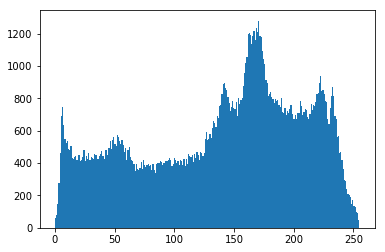

In [9]:
%matplotlib inline
from pylab import *
#Histogram of images
figure(1)
hist(array(img_gray).flatten(),256) # hist(a,b) => a: 1D array; b: nBins
show()

For more examples on matplotlib visit https://matplotlib.org/2.0.2/examples/index.html


### NumPy [doc: http://docs.scipy.org/doc/numpy/]

In [10]:
# Converting to numpy array and properties
img_arr = array(img)
print img_arr.shape, img_arr.dtype
img_grayarr = array(img.convert('L'),'f') # 'f' => floating point
print img_grayarr.shape, img_grayarr.dtype

(250, 600, 3) uint8
(250, 600) float32


In [11]:
# Acessing an element in an array
px1 = img_arr[100,100,2]
print('px1: '+ str(px1))

# Accessing multiple elements by slicing
px2 = img_grayarr[100,:] # all the elemts in a row
print('px2: '+ str(px2))

px3 = img_grayarr[100,30:40] # range of elements in a row
print('px3: '+ str(px3))

px4 = img_grayarr[:,-1] # last column
print('px4: '+ str(px4))

px1: 208
px2: [ 173.  173.  172.  173.  175.  173.  172.  172.  171.  168.  166.  160.
  161.  165.  165.  164.  169.  169.  168.  166.  164.  162.  160.  160.
  162.  159.  161.  168.  167.  164.  163.  158.  154.  156.  159.  159.
  158.  159.  159.  161.  166.  167.  170.  173.  174.  174.  175.  174.
  175.  174.  171.  170.  169.  168.  167.  166.  168.  165.  160.  160.
  156.  155.  154.  150.  147.  145.  144.  143.  143.  145.  147.  143.
  142.  137.  134.  135.  135.  128.  123.  120.  118.  114.  117.  113.
  117.  116.  110.  116.  123.  120.  122.  122.  119.  117.  118.  129.
  151.  157.  167.  173.  170.  174.  180.  167.  164.  167.  162.  164.
  159.  154.  155.  156.  157.  160.  160.  169.  181.  183.  186.  192.
  196.  201.  199.  198.  197.  197.  198.  198.  196.  195.  191.  187.
  184.  180.  178.  172.  166.  164.  159.  159.  156.  150.  141.  138.
  137.  134.  134.  138.  141.  143.  140.  139.  140.  143.  144.  144.
  145.  146.  149.  154.  153.  152. 

(0.0, 255.0)
(100.0, 200.0)


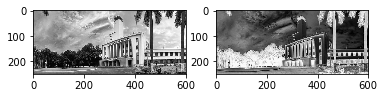

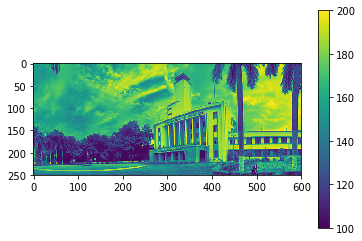

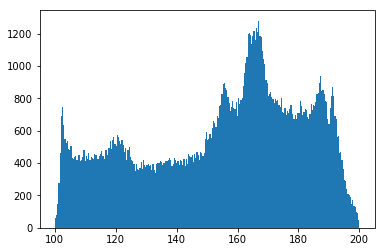

In [12]:
import matplotlib.pyplot as plt

# Graylevel transformations
img_grayinv = 255-img_grayarr
plt.subplot(1,2,1)
imshow(img_grayarr,'gray')
plt.subplot(1,2,2)
imshow(img_grayinv,'gray')

img_clamp = (100.0/255) * img_grayarr + 100 #clamp to interval 100...200
figure()
imshow(img_clamp)
plt.colorbar()

# Minimum and maximum values
print(img_grayarr.min(),img_grayarr.max())
print(img_clamp.min(),img_clamp.max())

figure()
hist(array(img_clamp).flatten(),256) # hist(a,b) => a: 1D array; b: nBins
show()

In [13]:
# Array to image
pil_img = Image.fromarray(uint8(img_clamp))
pil_img.show()

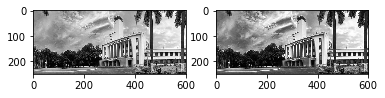

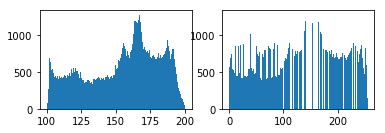

In [14]:
# Histogram equivalization
imhist,bins = np.histogram(img_clamp.flatten(),256)
cdf = imhist.cumsum() # cumulative distribution function
cdf = 255 * cdf / cdf[-1] # normalize
# use linear interpolation of cdf to find new pixel values
img_clampeq = interp(img_clamp.flatten(),bins[:-1],cdf).reshape(img_grayarr.shape)
plt.subplot(2,2,1)
imshow(Image.fromarray(uint8(img_clamp)),'gray')
plt.subplot(2,2,2)
imshow(Image.fromarray(uint8(img_clampeq)),'gray')
figure()
plt.subplot(2,2,3)
hist(array(img_clamp).flatten(),256) # hist(a,b) => a: 1D array; b: nBins
plt.subplot(2,2,4)
hist(array(img_clampeq).flatten(),256) # hist(a,b) => a: 1D array; b: nBins
show()
Image.fromarray(uint8(img_clamp)).save('tut01-results/iitkgp_clamp.png') 
Image.fromarray(uint8(img_clampeq)).save('tut01-results/iitkgp_clampEq.png') 

### Using pickle module for saving data

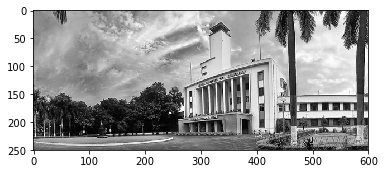

In [15]:
import pickle
# Saving data
with open('tut01-results/image_array.pkl','wb') as f:  # 'with' automatically handles opening and closing of files
    pickle.dump(img_grayarr,f)    

# Loading data
with open('tut01-results/image_array.pkl','rb') as f:
    img_ar = pickle.load(f)

imshow(img_ar,'gray')

### SciPy [doc: https://docs.scipy.org/doc/scipy/reference/]

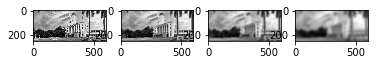

In [16]:
# Blurring images
from scipy.ndimage import filters

img_blur1 = filters.gaussian_filter(img_gray,2) # sigma(sd) = 2
img_blur2 = filters.gaussian_filter(img_gray,5) # sigma = 5
img_blur3 = filters.gaussian_filter(img_gray,10) # sigma = 10
plt.subplot(1,4,1)
imshow(img_gray,'gray')
plt.subplot(1,4,2)
imshow(img_blur1,'gray')
plt.subplot(1,4,3)
imshow(img_blur2,'gray')
plt.subplot(1,4,4)
imshow(img_blur3,'gray')

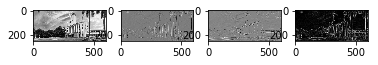

In [17]:
# Image gradients

#Sobel derivative filters
imx = zeros(img_grayarr.shape) 
filters.sobel(img_grayarr,1,imx) # operates on arrays!
imy = zeros(img_grayarr.shape)
filters.sobel(img_grayarr,0,imy)
img_grad = sqrt(imx**2+imy**2) # ** ==> squaring

plt.subplot(1,4,1)
imshow(img_gray,'gray')
plt.subplot(1,4,2)
imshow(imx,'gray')
plt.subplot(1,4,3)
imshow(imy,'gray')
plt.subplot(1,4,4)
imshow(img_grad,'gray')

In [18]:
# saving an array as image
import scipy.misc
scipy.misc.imsave('iitkgp_grad.png',img_grad)

### Excercise 2: Feature Extraction
#### Using skimgae [doc: http://scikit-image.org/docs/stable/]

In [19]:
from skimage import feature

In [30]:
# Co-ocurance matrix
coMatFeat = feature.greycomatrix(img_grayarr, [1], [np.pi/4],normed=True,levels=256) 
print(coMatFeat.shape)

# Properties of GLCM
coPropFeat = feature.greycoprops(coMatFeat, prop= 'homogeneity')
print(coPropFeat)



(256, 256, 1, 1)
[[ 0.16231471]]


In [121]:
# Histogram of Oriented Gradients
hogFeat = feature.hog(img_grayarr, orientations=4, pixels_per_cell=(50,50))
print(hogFeat.shape)

(1080,)


(250, 600)


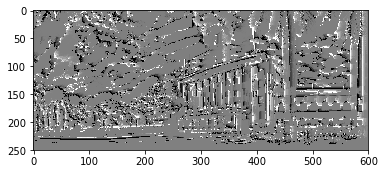

In [145]:
# Local binary pattern
lbpFeat = feature.local_binary_pattern(img_grayarr, 35, 15)
imshow(lbpFeat,'gray')
print(lbpFeat.shape)